In [1]:
!pip install -r requirements.txt

In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [96]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

sns.set(style="whitegrid")
sns.set_color_codes("muted")

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [4]:
raw_df = pd.read_csv('datasets/lyrics_by_year_1964_2023.csv', encoding='utf-8')
df = raw_df.sort_values(by=['year', 'id']).reset_index(drop=True)
df

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [178]:
len(df['singer'].unique()), len(df['id'].unique())

(1312, 4220)

In [6]:
df.sort_values(by='title')

,id,year,title,singer,lyric,x_rated
3573,3947371,2013,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
3563,3947371,2012,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
2112,78184,1998,'Cause I'm Your Girl,SES,Yeah\nwhat's up what's up SES\nWe open up the ...,False
1605,56840,1993,'친구'라 말할 수 있는 건,신성우,나 어릴적 뛰놀던 놀이터에\n회색 건물이 들어서 있고\n길을 걷는 수녀의 옷자락엔\...,False
4322,32399832,2020,0000 Zero O’Clock,방탄소년단,그런 날 있잖아\n이유 없이 슬픈 날\n몸은 무겁고\n나 빼곤 모두 다\n바쁘고 치...,False
...,...,...,...,...,...,...
2967,1459456,2007,흰눈,이루,한 사람을 너무 사랑했던거죠\n얼마나 나를\n아프게 할지도 모르고\n기뻐했죠\n이 ...,False
1237,1079798,1989,히말라야,이브,NaN,False
4410,32998018,2021,힘든 건 사랑이 아니다,임창정,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데\n어떤 아무 말도 아무것도 줄 ...,False
4365,32998018,2020,힘든 건 사랑이 아니다,임창정,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데\n어떤 아무 말도 아무것도 줄 ...,False


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4666 non-null   int64 
 1   year     4666 non-null   int64 
 2   title    4666 non-null   object
 3   singer   4666 non-null   object
 4   lyric    4458 non-null   object
 5   x_rated  4666 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 186.9+ KB


In [5]:
lyrics_all_df = df.copy()

In [183]:
unique_songs_all = lyrics_all_df.drop_duplicates(subset=['id'])
unique_songs_all

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [184]:
lyrics = unique_songs_all['lyric']
bar = tqdm(total=len(lyrics))
tokens_all = Counter()
for lyric in lyrics:
    if type(lyric) == str:
        tags = [f"{token.form}_{token.tag}" for token in kiwi.tokenize(lyric)]
        tokens_all += Counter(tags)
        del tags
    bar.update(1)

print(tokens_all)

  0%|          | 0/4220 [00:00<?, ?it/s]

Counter({'어_EC': 57050, '나_NP': 38001, 'ᆫ_ETM': 22604, '의_JKG': 21206, '너_NP': 20546, '이_VCP': 17468, 'ᆫ_JX': 17000, '는_ETM': 16105, '에_JKB': 15858, '이_JKS': 15819, '고_EC': 15403, '었_EP': 14956, '하_XSV': 14827, '을_JKO': 14620, 'ᆯ_ETM': 13690, 'ᆯ_JKO': 12498, '가_JKS': 11461, '지_EC': 11204, '사랑_NNG': 11112, '를_JKO': 10637, '도_JX': 10475, '은_ETM': 8911, '게_EC': 8788, '하_XSA': 8425, '는_JX': 8389, '어_EF': 8306, '거_NNB': 8210, '하_VV': 7671, '없_VA': 7548, '은_JX': 7490, '그_MM': 6987, '만_JX': 6821, '수_NNB': 6048, '주_VX': 5999, '것_NNB': 5527, '던_ETM': 5515, 'I_SL': 5451, '그대_NP': 5262, '말_NNG': 5246, '어도_EC': 5075, '보_VX': 4968, '에게_JKB': 4915, '면_EC': 4679, '않_VX': 4531, '우리_NP': 4130, '되_VV': 4107, '하_VX': 4020, '보_VV': 4015, '들_XSN': 3908, '말_VX': 3589, 'you_SL': 3588, '가_VV': 3445, '로_JKB': 3357, '있_VX': 3338, '을_ETM': 3330, '지_VX': 3299, '어서_EC': 3291, '어요_EF': 3285, "'_SS": 3095, '이_MM': 3070, '마음_NNG': 2998, '때_NNG': 2992, '다시_MAG': 2978, '알_VV': 2978, '야_EF': 2921, '있_VA': 2906, '사람_NNG'

```py
"NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
"VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
"MM", "MAG", "MAJ", # 관형사, 부사
"JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
"EP", "EF", "EC", "ETN", "ETM", # 어미
"XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
"SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
"SL", "SH", "SN", "SB", # 알파벳, 한자, 숫자, 글머리
"UN", # 분석 불가
"W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
"IC", # 감탄사
"Z_CODA", # 덧붙은 받침
"USER0", "USER1", "USER2", "USER3", "USER4" # 사용자 태그
```

In [185]:
rows = []
for key, count in tokens_all.items():
    k = key.split("_")
    form, tag = k[0], '_'.join(k[1:])
    tag = tag.replace("-I", '').replace("-R", '') # 규칙/불규칙 활용 무시
    rows.append((form, tag, count))

count_df = pd.DataFrame(rows, columns=['form', 'tag', 'count'])
count_df = count_df.sort_values(by=['count', 'tag'], ascending=[False, True])
count_df['form'] = count_df['form'].apply(str.lower)

del rows

count_df

,form,tag,count
8,어,EC,57050
130,나,NP,38001
48,ᆫ,ETM,22604
1,의,JKG,21206
612,너,NP,20546
...,...,...,...
15248,산,XSN,1
17171,인,XSN,1
17325,리,XSN,1
18612,력,XSN,1


In [21]:
tag_sr = count_df['tag']
is_english = tag_sr.isin(["SL"])
is_numeric = tag_sr.isin(["SN"])
is_kanji = tag_sr.isin(["SH"])
is_invalid = tag_sr.isin([
    "UN", # 분석 불가
    "W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
    "IC", # 감탄사
    "Z_CODA", # 덧붙은 받침
    "USER0", "USER1", "USER2", "USER3", "USER4"
])
is_alpha = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
])
is_symbol = tag_sr.isin([
    "SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
    "SB", # 글머리
    "IC", # 감탄사
])
is_noun = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
])
is_verb = tag_sr.isin(["VV", "VX"]) # 동사, 보조 용언
is_adjective = tag_sr.isin(["VA"]) # 형용사
is_adverbs = tag_sr.isin(["MM", "MAG", "MAJ"]) # 관형사, 일반 부사, 접속 부사
is_particle = tag_sr.isin(["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"]) # 조사

In [187]:
count_df[is_alpha].sort_values('count', ascending=False)

,form,tag,count
8,어,EC,57050
130,나,NP,38001
48,ᆫ,ETM,22604
1,의,JKG,21206
612,너,NP,20546
...,...,...,...
11026,찬스,NNG,1
11022,완젼,NNG,1
11018,탄탄대로,NNG,1
11015,고물,NNG,1


In [188]:
count_df[is_verb].sort_values('count', ascending=False)

,form,tag,count
63,하,VV,7671
265,주,VX,5999
59,보,VX,4968
370,않,VX,4531
459,되,VV,4107
...,...,...,...
10459,내보내,VV,1
10454,쫓아내,VV,1
10278,집어던지,VV,1
10248,고쳐먹,VV,1


In [189]:
count_df[is_noun].sort_values('count', ascending=False)

,form,tag,count
130,나,NP,38001
612,너,NP,20546
80,사랑,NNG,11112
1459,거,NNB,8210
127,수,NNB,6048
...,...,...,...
11535,뱃지,NNG,1
11536,완장,NNG,1
11537,리플,NNG,1
11539,어르신,NNG,1


In [190]:
# save to csv
count_df.to_csv('lyrics_word_count_kiwi.csv', encoding='utf-8', index=False)

In [191]:
!curl https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip -o notosanskr.zip
!unzip -n notosanskr.zip -d notosanskr/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  4599k      0  0:00:25  0:00:24  0:00:01 5511k 0  4397k      0  0:00:26  0:00:20  0:00:06 6150k      0  0:00:25  0:00:25 --:--:-- 5463k
Archive:  notosanskr.zip


In [192]:
count_df[is_noun | is_verb | is_adjective | is_adverbs][['form', 'count']]

,form,count
130,나,38001
612,너,20546
80,사랑,11112
1459,거,8210
63,하,7671
...,...,...
9390,굴,1
9398,만하,1
11402,체하,1
13947,부,1


In [17]:
def get_words_counts(df) -> dict:
    d = df[['form', 'count']]
    d.index = d['form']
    d = d.drop(['form'], axis=1)
    return d.to_dict()['count']

In [18]:
from wordcloud import WordCloud

fonts_dir = "notosanskr"
fonts = list(filter(lambda f: f.endswith(".otf"), os.listdir(fonts_dir)))
fonts = list(map(lambda f: os.path.join(fonts_dir, f), fonts))

In [22]:
def save_word_cloud(filename: str, data: dict, max_font_size=128, width=512, height=512):
    wc = WordCloud(font_path=fonts[0], background_color="white", max_font_size=max_font_size, width=width, height=height)
    cloud = wc.generate_from_frequencies(data)
    cloud.to_file(filename)
    return cloud


In [20]:
# Load count csv
count_df = pd.read_csv('datasets/lyrics_word_count_kiwi.csv', encoding='utf-8')

In [23]:
df = count_df[is_noun | is_verb | is_adjective | is_adverbs]
save_word_cloud('docs/kword_cloud_kr_all.png', get_words_counts(df))

In [197]:
df = count_df[is_noun]
save_word_cloud('word_cloud_kr_noun.png', get_words_counts(df))

In [26]:
df = count_df[is_verb].copy()
df['form'] = df['form'].apply(lambda s: s+'다')
save_word_cloud('word_cloud_kr_verb.png', get_words_counts(df))

In [199]:
df = count_df[is_adjective]
save_word_cloud('word_cloud_kr_adj.png', get_words_counts(df))

In [200]:
df = count_df[is_noun | is_verb]
save_word_cloud('word_cloud_kr_noun+verb.png', get_words_counts(df))

In [201]:
df = count_df[is_english]
save_word_cloud('word_cloud_en.png', get_words_counts(df))

In [202]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

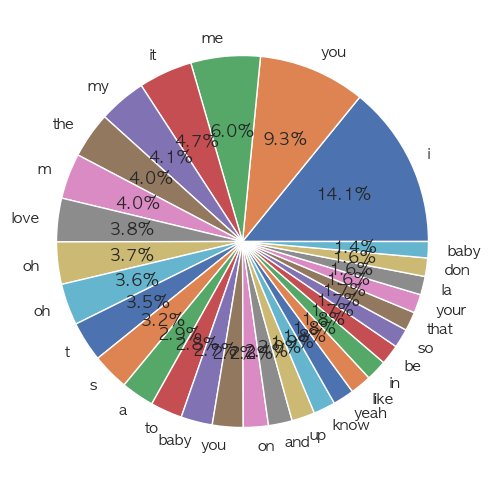

In [203]:
f, ax = plt.subplots(figsize=(6, 15))
limits = 30
en_count_df = count_df[is_english]
samples = en_count_df.iloc[:limits][['count', 'form']]
etc = en_count_df.iloc[limits:]['count'].sum()
# sns.barplot(x='count', y='form', data=en_count_df[['form', 'count']].iloc[:30], ax=ax)
plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.show()

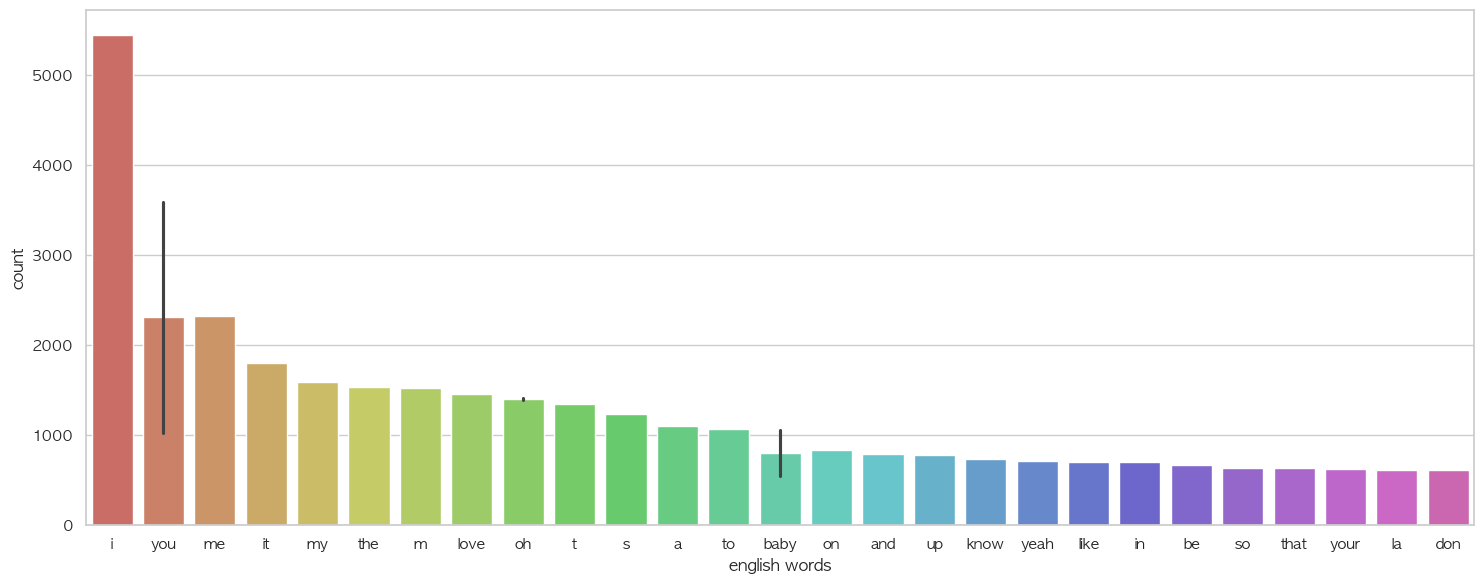

In [204]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_english].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
plt.xlabel('english words')
plt.tight_layout()
plt.show()

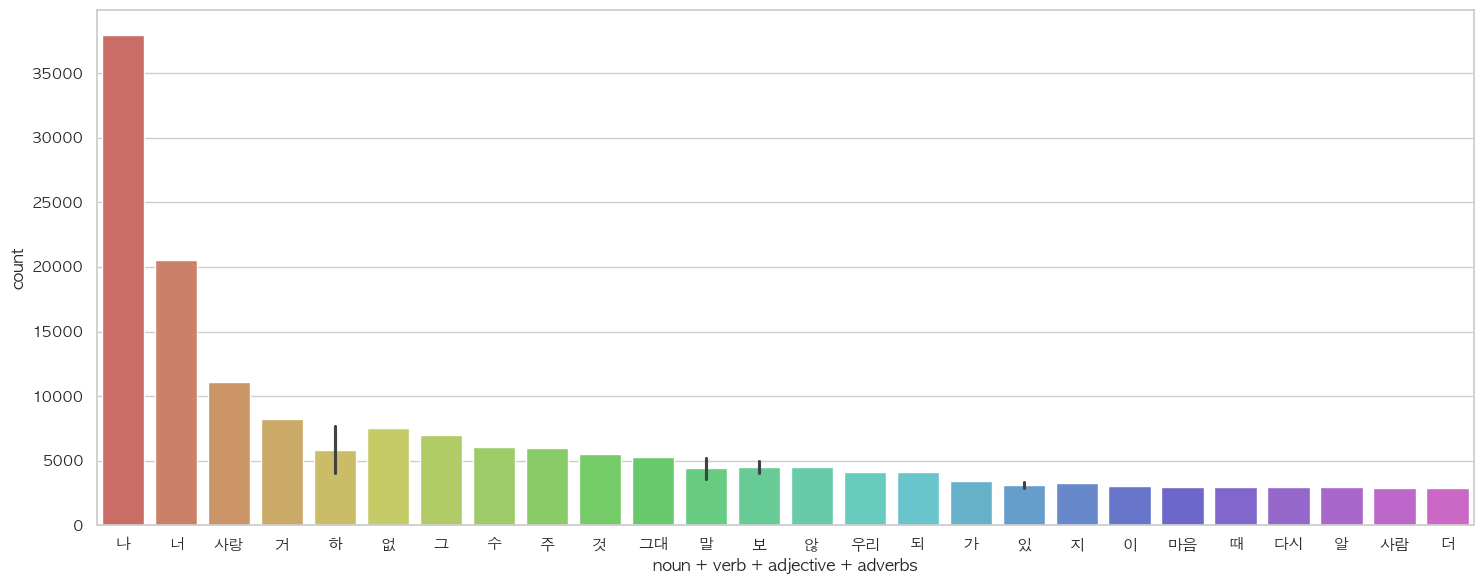

In [205]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_noun | is_verb | is_adjective | is_adverbs].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
# plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.xlabel('noun + verb + adjective + adverbs')
plt.tight_layout()
plt.show()

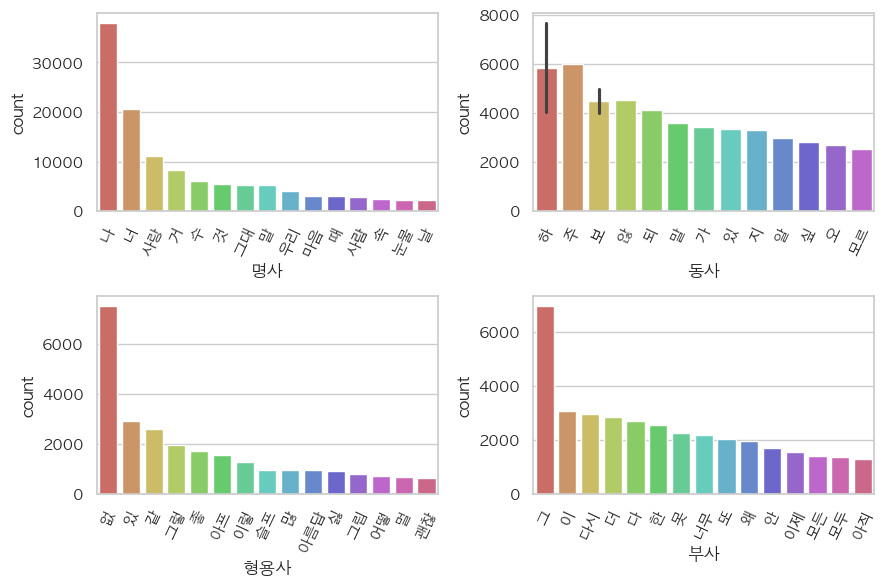

In [213]:
f, axes = plt.subplots(2, 2, figsize=(9, 6))
limits = 15
titles = ["명사", "동사", "형용사", "부사"]
conditions = [is_noun, is_verb, is_adjective, is_adverbs]
for i, (title, cond) in enumerate(zip(titles, conditions)):
    ax = axes[i // 2, i % 2]
    df = count_df[cond].sort_values(by='count', ascending=False).iloc[:limits]
    samples = df[['count', 'form']]
    sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
    ax.xaxis.set_tick_params(rotation=65)
    ax.set_xlabel(title)
plt.tight_layout(pad=1)
plt.show()

In [48]:
def tokenize(text) -> list:
    text = text if type(text) is str else ''
    text = text.replace('\n', ' ').strip()
    return kiwi.tokenize(text)

In [35]:
import numpy as np

kr_alpha_tags = [
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
]

rows = []
years = sorted(lyrics_all_df.year.unique())

for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    kr_wc, en_wc, etc = [], [], []
    kr_wc_r, en_wc_r, etc_r = [], [], []
    cnts = []
    for l in df['lyric']:
        tokens = tokenize(tokens)
        total = len(tokens)
        k, e = 0, 0
        for token in tokens:
            tag = str(token.tag).replace('-I', '').replace('-R', '')
            if tag in kr_alpha_tags:
                k += 1
            elif tag == "SL":
                e += 1
        z = total - k - e
        cnts.append(total)
        kr_wc.append(k)
        kr_wc_r.append(k / total if total > 0 else 0)
        en_wc.append(e)
        en_wc_r.append(e / total if total > 0 else 0)
        etc.append(z)
        etc_r.append(z / total if total > 0 else 0)
        
    rows.append([
        sum(kr_wc), sum(en_wc), sum(etc),
        np.mean(kr_wc_r), np.mean(en_wc_r), np.mean(etc_r),
        np.mean(cnts),
    ])

rows = np.array(rows)
print(rows)

  0%|          | 0/60 [00:00<?, ?it/s]

[[1.90700000e+03 0.00000000e+00 2.60000000e+01 8.95807318e-01
  0.00000000e+00 1.32835909e-02 8.78636364e+01]
 [1.07200000e+03 0.00000000e+00 8.00000000e+00 5.84196787e-01
  0.00000000e+00 4.03850758e-03 6.35294118e+01]
 [2.65300000e+03 0.00000000e+00 2.20000000e+01 8.51174595e-01
  0.00000000e+00 5.96826225e-03 9.55357143e+01]
 [4.16700000e+03 0.00000000e+00 4.70000000e+01 8.43163498e-01
  0.00000000e+00 1.04950386e-02 1.02780488e+02]
 [2.73000000e+03 8.00000000e+01 4.70000000e+01 8.96558740e-01
  1.54327689e-02 1.65799195e-02 1.02035714e+02]
 [3.82300000e+03 0.00000000e+00 3.90000000e+01 8.73287851e-01
  0.00000000e+00 9.06509038e-03 1.13588235e+02]
 [2.43400000e+03 0.00000000e+00 2.10000000e+01 7.63233309e-01
  0.00000000e+00 5.99746001e-03 9.44230769e+01]
 [3.11800000e+03 4.20000000e+01 6.30000000e+01 7.88148159e-01
  7.95454545e-03 1.63972953e-02 1.00718750e+02]
 [4.83400000e+03 0.00000000e+00 5.40000000e+01 8.77244945e-01
  0.00000000e+00 9.11869181e-03 1.11090909e+02]
 [5.535000

In [37]:
cnt_df = pd.DataFrame(rows, columns=[
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio',
    'avg_tokens'
])
cnt_df['year'] = years
for col in ['kr_words', 'en_words', 'etc_words']:
    cnt_df[col] = cnt_df[col].astype(int)
cnt_df = cnt_df[[
    'year', 'avg_tokens',
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'
]]
cnt_df

,year,avg_tokens,kr_words,en_words,etc_words,kr_words_ratio,en_words_ratio,etc_words_ratio
0,1964,87.863636,1907,0,26,0.895807,0.000000,0.013284
1,1965,63.529412,1072,0,8,0.584197,0.000000,0.004039
2,1966,95.535714,2653,0,22,0.851175,0.000000,0.005968
3,1967,102.780488,4167,0,47,0.843163,0.000000,0.010495
4,1968,102.035714,2730,80,47,0.896559,0.015433,0.016580
5,1969,113.588235,3823,0,39,0.873288,0.000000,0.009065
6,1970,94.423077,2434,0,21,0.763233,0.000000,0.005997
7,1971,100.718750,3118,42,63,0.788148,0.007955,0.016397
8,1972,111.090909,4834,0,54,0.877245,0.000000,0.009119
9,1973,143.743590,5535,0,71,0.885767,0.000000,0.011669


In [10]:
ratio_df = cnt_df[['year']].copy()
ratio_df['kr_en'] = cnt_df['kr_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df['en_kr'] = cnt_df['en_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df

,year,kr_en,en_kr
0,1964,1.000000,0.000000
1,1965,1.000000,0.000000
2,1966,1.000000,0.000000
3,1967,1.000000,0.000000
4,1968,0.983078,0.016922
5,1969,1.000000,0.000000
6,1970,1.000000,0.000000
7,1971,0.990008,0.009992
8,1972,1.000000,0.000000
9,1973,1.000000,0.000000


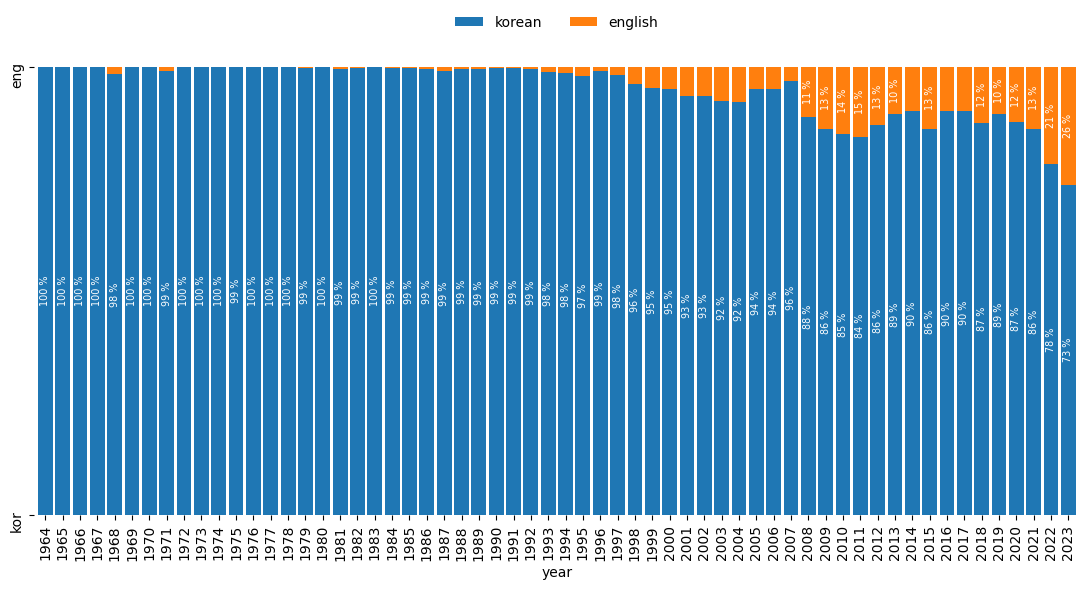

In [12]:
fig, ax = plt.subplots(1, 1, figsize=[11, 6])
x_var, y_var = "kr_en", "en_kr"
df_grouped = ratio_df[[x_var, y_var]]
df_grouped.columns = ['korean', 'english']
df_grouped.plot.bar(stacked=True, width=0.85, ax=ax)
plt.xticks(ticks=range(len(df_grouped)), labels=ratio_df['year'], rotation=90)
plt.yticks(ticks=[0, 1], labels=['kor', 'eng'], rotation=90)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                rotation=90,
                color="white",
                fontsize="x-small",
            )
        cumulative += element
plt.xlabel('year')
# plt.ylabel('korean vs. english')
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()

In [15]:
df = cnt_df.copy()
df['kr_ratio'] = ratio_df['kr_en']
df['en_ratio'] = ratio_df['en_kr']
df.to_csv('language_ratio_per_year.csv', index=False)

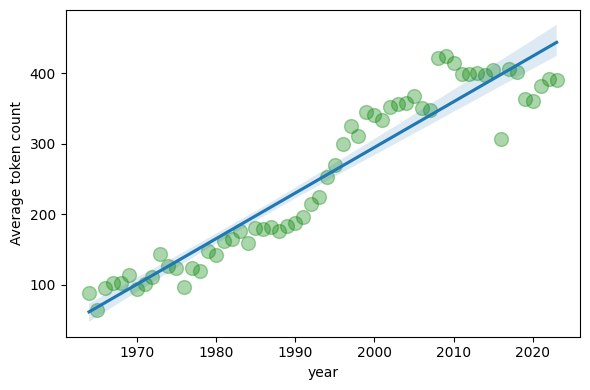

In [47]:
plt.figure(figsize=(6, 4))
sns.regplot(data=cnt_df, x='year', y='avg_tokens', scatter_kws={"fc": "g", "ec": "g", "s": 100, "alpha": 0.33})
plt.ylabel('Average token count')
plt.tight_layout()
plt.show()

In [165]:
tags_to_see = set([
    "NNG", "NNP", "NNB", # 체언 (일반 명사, 고유 명사, 의존 명사)
    # "NR", "NP", # 체언 (수사, 대명사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    # "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    # "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    # "EP", "EF", "EC", "ETN", "ETM", # 어미
    # "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
])

rows = []
tags_counter = Counter()
for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    c = Counter()
    tl = 0
    for lyric in df['lyric']:
        tokens = tokenize(lyric)
        tl += len(tokens)
        for token in tokens:
            form = str(token.form or '')
            if token.tag in tags_to_see:
                c[form] += 1
    flatten = [i for a in c.most_common(n=10) for i in a]
    rows.append([year, tl] + flatten)
    tags_counter += c
    del c

tags_counter.most_common(n=10)

  0%|          | 0/60 [00:00<?, ?it/s]

[('이', 19671),
 ('하', 13028),
 ('사랑', 12237),
 ('말', 10213),
 ('보', 10010),
 ('있', 9445),
 ('거', 9053),
 ('없', 8346),
 ('주', 7761),
 ('수', 6859)]

In [166]:
tags_counter.most_common(n=30)

[('이', 19671),
 ('하', 13028),
 ('사랑', 12237),
 ('말', 10213),
 ('보', 10010),
 ('있', 9445),
 ('거', 9053),
 ('없', 8346),
 ('주', 7761),
 ('수', 6859),
 ('것', 6184),
 ('가', 6034),
 ('않', 5102),
 ('되', 4572),
 ('지', 4252),
 ('오', 4109),
 ('알', 3366),
 ('마음', 3351),
 ('때', 3300),
 ('싶', 3279),
 ('사람', 3144),
 ('같', 2896),
 ('날', 2888),
 ('버리', 2848),
 ('모르', 2819),
 ('속', 2765),
 ('잊', 2703),
 ('눈물', 2510),
 ('맘', 2403),
 ('떠나', 2358)]

In [167]:
cols = []
for i in range(1, 11, 1):
    cols += [f"top_{i}_w", f"top_{i}_c"]
rows = np.array(rows)
print(rows.shape, cols)
top_10_wcy_df = pd.DataFrame(rows, columns=['year', 'tokens'] + cols)
top_10_wcy_df

(60, 22) ['top_1_w', 'top_1_c', 'top_2_w', 'top_2_c', 'top_3_w', 'top_3_c', 'top_4_w', 'top_4_c', 'top_5_w', 'top_5_c', 'top_6_w', 'top_6_c', 'top_7_w', 'top_7_c', 'top_8_w', 'top_8_c', 'top_9_w', 'top_9_c', 'top_10_w', 'top_10_c']


,year,tokens,top_1_w,top_1_c,top_2_w,top_2_c,top_3_w,top_3_c,top_4_w,top_4_c,...,top_6_w,top_6_c,top_7_w,top_7_c,top_8_w,top_8_c,top_9_w,top_9_c,top_10_w,top_10_c
0,1964,1933,이,24,가,23,오,17,밤,16,...,잊,15,아가씨,12,보,12,가슴,12,마음,12
1,1965,1080,이,26,마음,12,하,10,모르,9,...,말,7,꿈,7,이름,7,소녀,7,것,7
2,1966,2675,가,32,이,28,사랑,25,길,22,...,보,18,말,18,오,17,밤,17,가슴,17
3,1967,4214,사랑,76,하,60,이,49,가,46,...,울,40,말,38,오,28,보,25,사람,23
4,1968,2857,가,39,사랑,32,하,31,마음,25,...,길,24,없,24,지,20,보,17,가슴,15
5,1969,3862,사랑,78,이,51,꽃,50,사람,36,...,가,31,오,31,보,24,하,24,님,23
6,1970,2455,이,44,사랑,40,가,30,주,29,...,마음,23,울,23,잊,23,모르,21,사람,17
7,1971,3223,이,57,오,55,가,43,사랑,34,...,말,27,사람,27,주,25,마음,18,있,18
8,1972,4888,이,78,달,56,가,55,사랑,45,...,별,32,하,30,말,25,보,23,뜨,23
9,1973,5606,가,69,이,68,하,54,오,48,...,사랑,44,보,43,있,41,말,39,만나,32


In [168]:
rows = []
words_group = set(["오", "가", "사랑", "말", "보", "주", "있", "없"])

for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    c = {w: 0 for w in words_group}
    tl = 0
    for lyric in df['lyric']:
        tokens = tokenize(lyric)
        tl += len(tokens)
        for token in tokens:
            form = str(token.form or '')
            if form in words_group:
                c[form] += 1
    rows.append([year, tl] + list(c.values()))

cols = list(({w: 0 for w in words_group}).keys())
wcy_df = pd.DataFrame(np.array(rows), columns=['year', 'tokens'] + cols)
wcy_df

  0%|          | 0/60 [00:00<?, ?it/s]

,year,tokens,오,보,주,있,말,없,가,사랑
0,1964,1933,22,12,7,5,8,1,30,8
1,1965,1080,6,3,5,4,7,3,18,6
2,1966,2675,19,18,5,15,18,17,54,25
3,1967,4214,37,25,19,10,38,19,86,76
4,1968,2857,25,17,13,9,8,24,55,32
5,1969,3862,43,24,11,8,22,12,60,78
6,1970,2455,41,7,29,3,9,13,44,40
7,1971,3223,78,13,25,18,27,10,72,34
8,1972,4888,58,23,16,14,25,17,92,45
9,1973,5606,61,43,25,41,39,21,123,44


/var/folders/gr/htls9_1d35n657q516khzk_c0000gn/T/ipykernel_30932/35721157.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


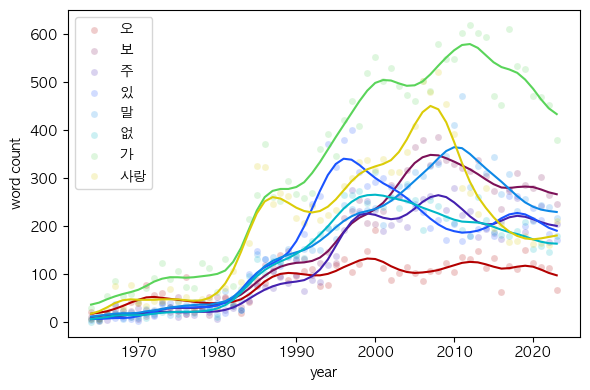

In [169]:
from matplotlib import rc
from scipy.ndimage.filters import gaussian_filter1d

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 4))
color8 = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#dbcc08"]
for col, color in zip(cols, color8):
    df1 = wcy_df[['year', col]]
    df1.loc[:, col] = gaussian_filter1d(df1[col], sigma=2)
    sns.scatterplot(data=wcy_df, x='year', y=col, fc=color, s=25, alpha=0.2, label=col)
    # sns.lineplot(data=wcy_df, x='year', y=col, color=color, alpha=0.2, linewidth=1, linestyle='--')
    sns.lineplot(data=df1, x='year', y=col, color=color) # smooth line
plt.ylabel('word count')
plt.tight_layout()
plt.show()

In [170]:
wcy_r_df = wcy_df[cols].apply(lambda sr: sr / wcy_df['tokens'])
wcy_r_df.index = wcy_df['year']
wcy_r_df.head(10)

,오,보,주,있,말,없,가,사랑
year,,,,,,,,
1964,0.011381,0.006208,0.003621,0.002587,0.004139,0.000517,0.015520,0.004139
1965,0.005556,0.002778,0.004630,0.003704,0.006481,0.002778,0.016667,0.005556
1966,0.007103,0.006729,0.001869,0.005607,0.006729,0.006355,0.020187,0.009346
1967,0.008780,0.005933,0.004509,0.002373,0.009018,0.004509,0.020408,0.018035
1968,0.008750,0.005950,0.004550,0.003150,0.002800,0.008400,0.019251,0.011201
1969,0.011134,0.006214,0.002848,0.002071,0.005697,0.003107,0.015536,0.020197
1970,0.016701,0.002851,0.011813,0.001222,0.003666,0.005295,0.017923,0.016293
1971,0.024201,0.004034,0.007757,0.005585,0.008377,0.003103,0.022339,0.010549
1972,0.011866,0.004705,0.003273,0.002864,0.005115,0.003478,0.018822,0.009206


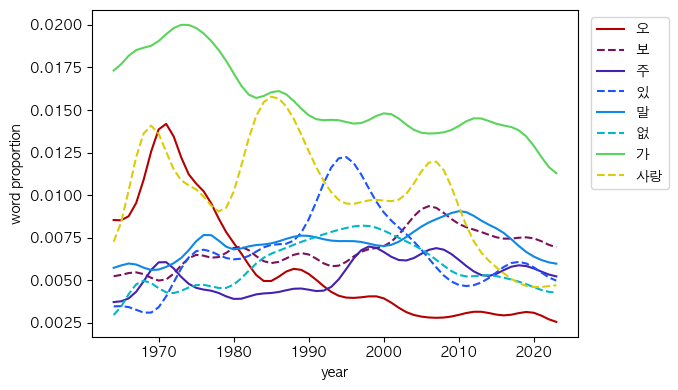

In [184]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(7, 4))
color8 = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#dbcc08"]
lsty = ['-', '--', '-', '--', '-', '--', '-', '--']
for col, color, ls in zip(cols, color8, lsty):
    df1 = wcy_r_df[[col]].copy()
    df1.loc[:, col] = gaussian_filter1d(df1[col], sigma=2)
    sns.lineplot(data=df1, x=df1.index, y=col, color=color, label=col, linestyle=ls) # smooth line
plt.ylabel('word proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
plt.show()

In [204]:
c10 = Counter()
for row in top_10_wcy_df.values:
    row = row[2:]
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        c10[str(form)] += int(cnt)
c10

Counter({'이': 19671,
         '하': 12681,
         '사랑': 10264,
         '보': 6466,
         '말': 6428,
         '거': 4896,
         '있': 4343,
         '가': 1328,
         '없': 1163,
         '마음': 469,
         '수': 445,
         '주': 363,
         '오': 322,
         '것': 319,
         '달': 56,
         '꽃': 50,
         '라': 40,
         '사람': 36,
         '뛰뛰': 36,
         '마리아': 35,
         '길': 22,
         '살짜기': 21,
         '밤': 16,
         '울': 15,
         '모르': 9})

In [215]:
cols = ["이", "하", "사랑", "보", "말", "거", "있", "가", "없", "마음", "수", "주", "오", "것", "달"]
rows = []
for row in top_10_wcy_df.values:
    row = row[2:]
    d = {col: 0 for col in cols}
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        if form in d:
            d[form] = cnt
    keys = d.keys()
    rows += [list(d.values())]

df15 = pd.DataFrame(rows, columns=cols)
df15.index = top_10_wcy_df['year']
df15

,이,하,사랑,보,말,거,있,가,없,마음,수,주,오,것,달
year,,,,,,,,,,,,,,,
1964,24,0,0,0,0,0,0,23,0,0,0,0,17,0,0
1965,26,10,0,0,0,0,0,9,0,12,0,0,0,0,0
1966,28,0,25,0,0,0,0,32,0,0,0,0,0,0,0
1967,49,60,76,0,0,0,0,46,0,45,0,0,0,0,0
1968,25,31,32,0,0,0,0,39,0,25,0,0,0,0,0
1969,51,0,78,0,0,0,0,0,0,0,0,0,0,0,0
1970,44,0,40,0,0,0,0,30,0,0,0,29,27,0,0
1971,57,32,34,0,0,0,0,43,0,0,0,0,55,0,0
1972,78,0,45,0,0,0,0,55,0,0,0,0,43,0,56


![](docs/kiwi/word_freq_per_year.png)

In [219]:
cols = ["이", "하", "사랑", "보", "말", "거", "있", "가", "없", "마음", "수", "주", "오", "것", "달"]
rows = []
for row in top_10_wcy_df.values:
    row = row[2:]
    d = {col: 0 for col in cols}
    ca = 0
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        if form in d:
            d[form] = int(cnt)
            ca += int(cnt)
    keys = d.keys()
    lr = [v / ca for v in d.values()]
    rows += [lr]

df15 = pd.DataFrame(rows, columns=cols)
df15.index = top_10_wcy_df['year']
df15

,이,하,사랑,보,말,거,있,가,없,마음,수,주,오,것,달
year,,,,,,,,,,,,,,,
1964,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.359375,0.000000,0.000000,0.000000,0.000000,0.265625,0.000000,0.000000
1965,0.456140,0.175439,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000
1966,0.329412,0.000000,0.294118,0.000000,0.000000,0.000000,0.000000,0.376471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1967,0.177536,0.217391,0.275362,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.163043,0.000000,0.000000,0.000000,0.000000,0.000000
1968,0.164474,0.203947,0.210526,0.000000,0.000000,0.000000,0.000000,0.256579,0.000000,0.164474,0.000000,0.000000,0.000000,0.000000,0.000000
1969,0.395349,0.000000,0.604651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970,0.258824,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.000000,0.170588,0.158824,0.000000,0.000000
1971,0.257919,0.144796,0.153846,0.000000,0.000000,0.000000,0.000000,0.194570,0.000000,0.000000,0.000000,0.000000,0.248869,0.000000,0.000000
1972,0.281588,0.000000,0.162455,0.000000,0.000000,0.000000,0.000000,0.198556,0.000000,0.000000,0.000000,0.000000,0.155235,0.000000,0.202166


![](docs/kiwi/word_freq_r_per_year.png)

In [289]:
def filter_counter(counter, threshold = 1):
    return Counter({k: c for k, c in counter.items() if c >= threshold})

In [465]:
import re

def remove_special_chars(text):
    text = re.sub('[?!<>@#$\~\\/\.&*\-\+=_,:;\{\}\[\]\(\)]', ' ', text)
    return re.sub('[\s]{2,}', ' ', text).replace('\n', ' ')

def normalize(v):
    return np.array(v, dtype=np.float32) / np.linalg.norm(v)

def get_repeatability(lyric):
    if (type(lyric) != str) or len(lyric) < 0:
        return 0.0, ([], 0, 0)
    l = remove_special_chars(lyric)
    c = Counter(l.split())
    c = filter_counter(c, threshold=2)
    freq = np.array(list(c.values() or []))
    c2 = Counter(freq)
    if len(freq) == 0:
        avg, std = 0., 0.
    else:
        avg, std = freq.mean(), freq.std()
    repeatability = sum([k * v for k, v in c2.items()]) ** .5
    return repeatability, (freq, avg, std)

def plot_rep(lyric, title, singer, ax):
    repeatability, info = get_repeatability(lyric)
    freq, avg, std = info
    sns.histplot(freq, common_bins=20, ax=ax)
    ax.set_title(f"{title}\n{singer}\n(rep: {repeatability:3.2f})")
    ax.set_ylabel('size of word group')
    ax.set_xlabel('Frequency')
    ax.barh(avg, width=freq.max() - 1., height=0.5, color='red', alpha=0.5, left=1.5)
    ax.barh(repeatability, width=freq.max() - 1., height=0.5, color='blue', alpha=0.5, left=1.5)

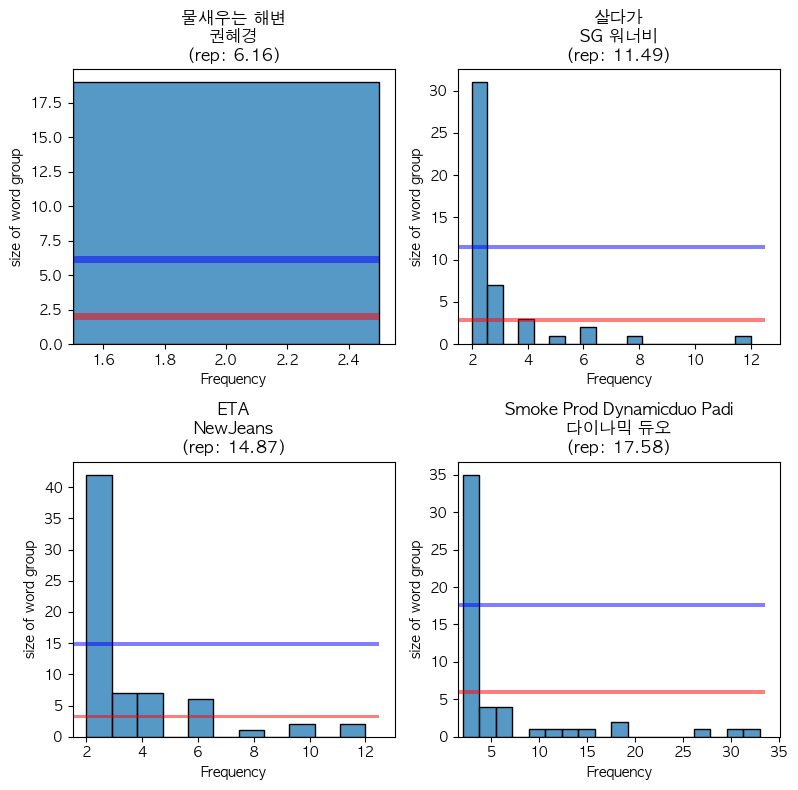

In [466]:
sample_ids = [711626, 36635522, 36761467, 5758967]
unique_songs_all = lyrics_all_df.drop_duplicates('id')
samples = unique_songs_all[unique_songs_all.id.isin(sample_ids)]
ci_title = list(samples.columns).index("title")
ci_singer = list(samples.columns).index("singer")
ci_lyric = list(samples.columns).index("lyric")
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
it = 0
for idx, row in samples.iterrows():
    ax = axes[it // 2, it % 2]
    it += 1
    title, singer, lyric = row[ci_title], row[ci_singer], row[ci_lyric]
    plot_rep(lyric, title, singer, ax)
plt.tight_layout()
plt.show()

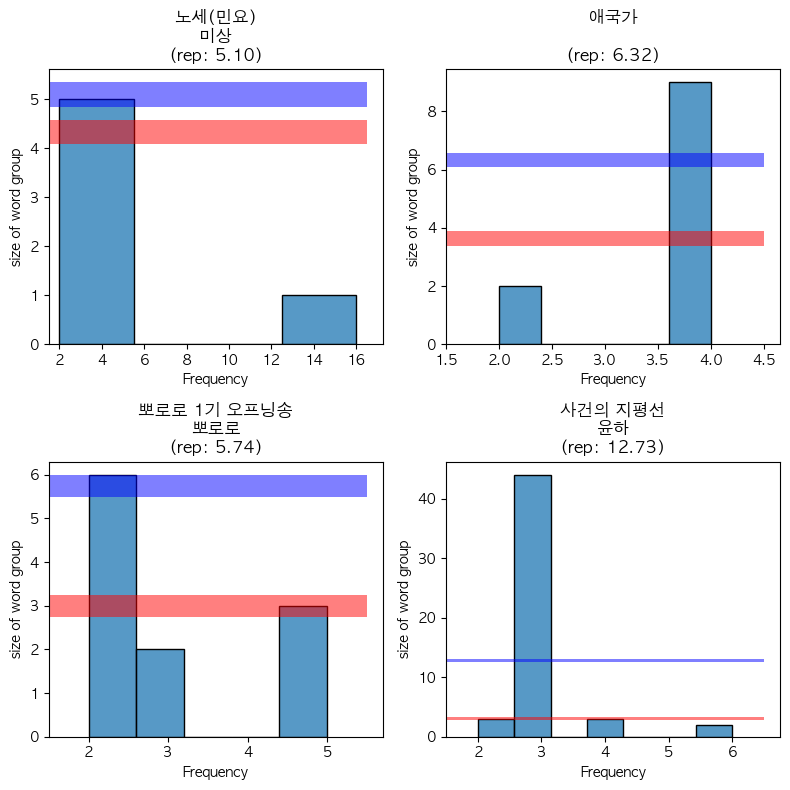

In [446]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

lyric = """노세노세 젊어서 놀아 늙어지며는 못노나니
화무는 십일홍이요 달도 차면 기우나니라
얼시구절시구 차차차(차차차)
지화자 좋구나 차차차(차차차)
화란춘성 만화방창 아니노지는 못하리라
차차차(차차차)차차차(차차차)

가세가세 산천경계로 늙기나 전에 구경가세
인생은 일장의 춘몽 둥글둥글 살아나가자
얼시구절시구 차차차(차차차)
지화자 좋구나 차차차(차차차)
춘풍화류 호시절에 아니노지는 못하리라
차차차(차차차) 차차차(차차차)"""
plot_rep(lyric, "노세(민요)", "미상", axes[0, 0])

lyric = """동해 물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

남산 위에 저 소나무, 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세."""
plot_rep(lyric, "애국가", "", axes[0, 1])

lyric = """야 뽀로로다
노는 게 제일 좋아 친구들 모여라
언제나 즐거워 개구쟁이 뽀로로
눈 덮인 숲 속 마을 꼬마 펭귄 나가신다
언제나 즐거워 오늘은 또 무슨 일이 생길까
뽀로로를 불러봐요 뽀롱뽀롱
뽀로로 뽀롱뽀롱 뽀로로
뽀롱뽀롱 뽀롱뽀롱 뽀롱뽀롱 뽀롱 뽀로로
노는 게 제일 좋아 친구들 모여라
언제나 즐거워
뽀롱 뽀롱 뽀롱 뽀롱 뽀로로"""
plot_rep(lyric, "뽀로로 1기 오프닝송", "뽀로로", axes[1, 0])

lyric = """생각이 많은 건 말이야
당연히 해야 할 일이야
나에겐 우리가 지금 1순위야
안전한 유리병을 핑계로
바람을 가둬 둔 것 같지만
기억나? 그날의 우리가
잡았던 그 손엔 말이야
설레임보다 커다란 믿음이 담겨서
난 함박웃음을 지었지만
울음이 날 것도 같았어
소중한 건 언제나 두려움이니까
문을 열면 들리던 목소리
너로 인해 변해있던 따뜻한 공기
여전히 자신 없지만 안녕히
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
솔직히 두렵기도 하지만
노력은 우리에게 정답이 아니라서
마지막 선물은 산뜻한 안녕
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
사건의 지평선 너머로"""
plot_rep(lyric, "사건의 지평선", "윤하", axes[1, 1])

plt.tight_layout()
plt.show()

In [480]:
rows = []
for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year]
    rep_scores = df['lyric'].astype(str).apply(lambda s: get_repeatability(s)[0])
    val = rep_scores.values
    val_nz = list(set(val) - set([0.0])) # except 0.0 of no lyric
    rows.append((year, np.mean(val_nz), np.min(val_nz), np.max(val_nz)))

rep_df = pd.DataFrame(rows, columns=['year', 'avg_rep', 'min_rep', 'max_rep'])
rep_df

  0%|          | 0/60 [00:00<?, ?it/s]

,year,avg_rep,min_rep,max_rep
0,1964,5.155399,2.000000,8.366600
1,1965,4.995707,2.000000,8.000000
2,1966,5.465955,2.000000,9.539392
3,1967,6.076396,2.449490,10.049876
4,1968,5.463163,3.464102,9.695360
5,1969,6.398540,2.828427,10.246951
6,1970,6.097119,2.449490,10.630146
7,1971,6.441456,3.162278,10.440307
8,1972,6.518353,3.605551,10.099505
9,1973,7.545208,2.449490,12.449900


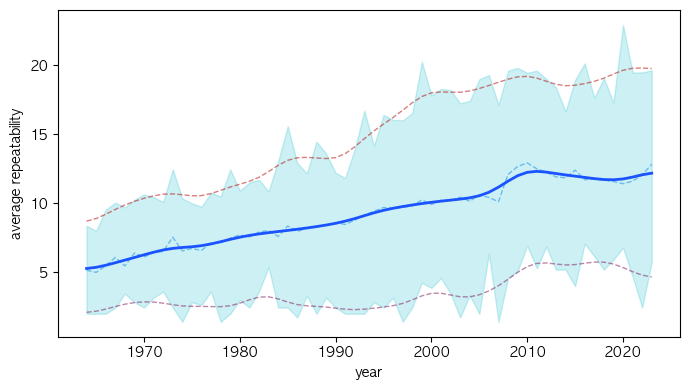

In [495]:
plt.figure(figsize=(7, 4))
color8 = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#dbcc08"]
df1 = rep_df.copy()
df1["avg_rep_smooth"] = gaussian_filter1d(df1["avg_rep"], sigma=2)
df1["min_rep_smooth"] = gaussian_filter1d(df1["min_rep"], sigma=2)
df1["max_rep_smooth"] = gaussian_filter1d(df1["max_rep"], sigma=2)
plt.fill_between(df1['year'], df1["min_rep"], df1["max_rep"], color="#00b7c7", alpha=0.2)
sns.lineplot(data=df1, x="year", y="avg_rep", color="#0d88e6", linewidth=1, alpha=0.5, linestyle='--')
sns.lineplot(data=df1, x="year", y="min_rep_smooth", color="#7c1158", linewidth=1, alpha=0.5, linestyle='--') # smooth line
sns.lineplot(data=df1, x="year", y="max_rep_smooth", color="#b30000", linewidth=1, alpha=0.5, linestyle='--') # smooth line
sns.lineplot(data=df1, x="year", y="avg_rep_smooth", color="#1a53ff", linewidth=2, alpha=1.0) # smooth line
plt.ylabel('average repeatability')
plt.tight_layout()
plt.show()